# Available Pre-Computed Features

The Allen Institute also has many more precomputed features. Many of them give access to more information on the electrophysiology, morphology, and metadata on the cells available in the Allen. We will demonstrate some of these features below.

In [38]:
#Import all the necessary packages and initalize an instance of the cache
import pandas as pd
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
import matplotlib.pyplot as plt
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

The `all_features` method can be used to access the morphology and electrophysiology of all the cells in the database and merges the two into a single table. This method can take into two optional inputs; `dataframe` and `require_reconstructon`.

In [39]:
all_features = ctc.get_all_features(dataframe = True)
all_features.head()

/Users/VictorMagdaleno/opt/anaconda3/lib/python3.7/site-packages/allensdk/core/cell_types_cache.py:271: UserWarning: dataframe argument is deprecated.
  warnings.warn("dataframe argument is deprecated.")


,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
0,NaN,134.700000,22.697498,8.335459e-02,1.18768,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,581.674568,0.1144,0.1144,0.28,444.247484,False,3D Neuron Reconstruction morphology,9995.218601,16666.213729,2355.765059
1,NaN,NaN,-24.887498,-3.913630e-19,1.09984,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,391.393464,0.1144,0.1144,0.28,1997.534304,False,3D Neuron Reconstruction morphology,6533.385774,13173.179026,2962.024123
2,0.044825,91.322222,-46.761876,2.238637e-01,1.19024,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,236.976305,0.1144,0.1144,0.28,522.952356,False,3D Neuron Reconstruction morphology,2067.805445,3180.344934,460.354199
3,0.002303,8.756140,-33.787497,6.366711e-01,1.72910,16.728967,1.023988,-60.968754,-63.145835,-66.856253,...,332.948545,0.1144,0.1144,0.28,76.604264,False,3D Neuron Reconstruction morphology,3488.103438,2371.871389,129.985840
4,0.093492,112.245000,3.015000,1.500000e-01,1.10920,5.458287,1.025020,-51.062504,-57.916670,-56.531254,...,374.603996,0.1144,0.1144,0.28,77.936062,False,3D Neuron Reconstruction morphology,2977.161146,2703.134880,204.115177


Since we set the `dataframe` parameter to `True`, the method returns our data as a nice and neat pandas dataframe. If set to `False`, the method returns a dictionary. We can all check to make sure all the columns are there by executing the `get_ephys_features` and `get_morphology_features` seperately and comparing the columns.

In [40]:
all_features_columns = all_features.columns
all_features_columns

Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id_x', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'specimen_id',
       'tau', 'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'thresho

In [41]:
# Store all ephys columns in a variable 
ephys_df = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
ephys_columns = ephys_df.columns

# Store all morphology columns in a variable 
morphology_df = pd.DataFrame(ctc.get_morphology_features()).set_index('specimen_id')
morphology_columns = morphology_df.columns 

# Combine the two into one list
ephys_and_morphology = list(morphology_columns) + list(ephys_columns)

# Sort and Compare the columns to make sure they are all there 
print(list(all_features_columns).sort() == ephys_and_morphology.sort())

True


By default, `get_all_features()` only returns ephys and morphology features for cells that have reconstructions. To access all cells regardless of reconstruction, set the parameter `require_recontruction` to `False`.

Below we have created a pandas dataframe from the data on mouse cells and set the row indices to be the `id` column. This will give us the metadata on mouse cells along and ID's to choose from. 

In [42]:
mouse_df = pd.DataFrame(ctc.get_cells(species = [CellTypesApi.MOUSE])).set_index('id')
mouse_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN
485909730,positive,"[8881.0, 953.839501299405, 7768.22695782726]",Mus musculus,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,dendrite-only,,485250100,right,0.478344
323865917,positive,"[8125.0, 904.841803028986, 7819.69986630448]",Mus musculus,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,dendrite-only,,322489588,left,0.608590


The Allen has many pre-computed features that you might consider comparing across cells. Some of these features include input resistance (input_resistance_mohm), Adapation ratio (adaptation), Average ISI (avg_isi), and many others (you can find a complete glossary <a href = "https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit#heading=h.t0p3wngfkxc1"> here </a>).

We combined the human metadata with our electrophysiology dataframe. From our new human electrophysiology dataframe, we created two dataframes to compare spiny dendrite types to aspiny dendrite types.

In [43]:
# gather all spiny and aspiny e cells into different dataframes
mouse_spiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type']=='spiny']
mouse_aspiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type']=='aspiny']

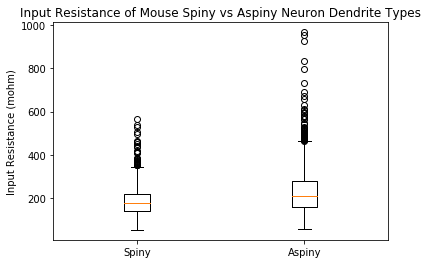

In [44]:
# plot our figure 
plt.boxplot([mouse_spiny_df['input_resistance_mohm'], mouse_aspiny_df['input_resistance_mohm']])
plt.ylabel('Input Resistance (mohm)')
plt.xticks([1,2], ['Spiny', 'Aspiny'])
plt.title('Input Resistance of Mouse Spiny vs Aspiny Neuron Dendrite Types')

plt.show()

In [45]:
# download our Human cells data and combine with our electrophysiology data
human_df = pd.DataFrame(ctc.get_cells(species = [CellTypesApi.HUMAN])).set_index('id')
human_ephys_df = human_df.join(ephys_df)

In [46]:
# compare two different brain structures 
human_MTG_df = human_ephys_df[human_ephys_df['structure_area_abbrev']=='MTG']
human_MFG_df = human_ephys_df[human_ephys_df['structure_area_abbrev']=='MFG']

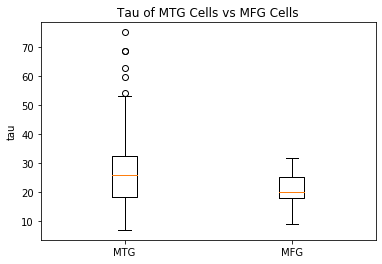

In [47]:
# plot our figure 
plt.boxplot([human_MTG_df['tau'], human_MFG_df['tau']])
plt.ylabel('tau')
plt.xticks([1,2], ['MTG', 'MFG'])
plt.title('Tau of MTG Cells vs MFG Cells')

plt.show()

In [48]:
# drop all null values in our column of interest in order to plot
human_MTG_df = human_MTG_df.dropna(subset =['avg_isi'])
human_MFG_df = human_MFG_df.dropna(subset = ['avg_isi'])

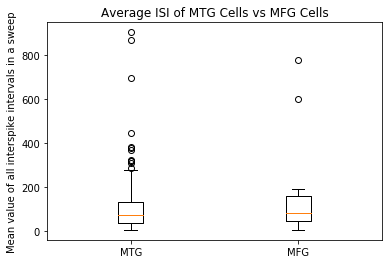

In [49]:
# plot our figure 
plt.boxplot([human_MTG_df['avg_isi'], human_MFG_df['avg_isi']])
plt.ylabel('Mean value of all interspike intervals in a sweep')
plt.xticks([1,2], ['MTG', 'MFG'])
plt.title('Average ISI of MTG Cells vs MFG Cells')

plt.show()

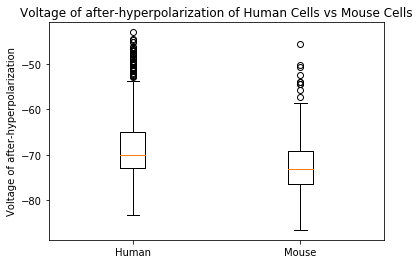

In [50]:
# plot our figure 
plt.boxplot([human_ephys_df['trough_v_short_square'], mouse_ephys_df['trough_v_short_square']])
plt.ylabel('Voltage of after-hyperpolarization')
plt.xticks([1,2], ['Human', 'Mouse'])
plt.title('Voltage of after-hyperpolarization of Human Cells vs Mouse Cells')

plt.show()

In [51]:
# compare cells of different disease states 
human_tumor_df = human_ephys_df[human_ephys_df['disease_state']=='tumor']
human_epilepsy_df = human_ephys_df[human_ephys_df['disease_state']=='epilepsy']

# remove all NaN values in adaptation column to create boxplot 
human_tumor_df = human_tumor_df.dropna(subset = ['adaptation'])
human_epilepsy_df = human_epilepsy_df.dropna(subset = ['adaptation'])

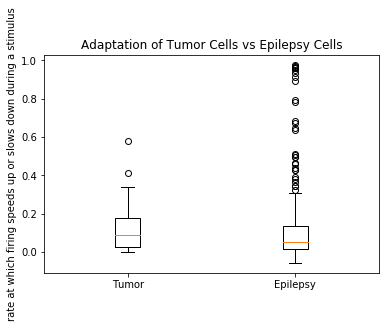

In [52]:
# plot our figure 
plt.boxplot([human_tumor_df['adaptation'], human_epilepsy_df['adaptation']])
plt.ylabel('rate at which firing speeds up or slows down during a stimulus')
plt.xticks([1,2], ['Tumor', 'Epilepsy'])
plt.title('Adaptation of Tumor Cells vs Epilepsy Cells')

plt.show()